# Занятие 6. «Python для анализа данных: pandas»

## Задание 1

*Используем файл keywords.csv.*

*Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.*

*Результат классификации запишите в отдельный столбец region.*

In [1]:
import pandas as pd

def geo(query):
    
    geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

    }
    
    for region in geo_data:
        for city in geo_data[region]:
            if city in query:
                
                return(region)
            
    return('undefined')
        

keywords = pd.read_csv('../keywords.csv')


keywords['region'] = keywords['keyword'].apply(geo)

keywords[keywords['region'] != 'undefined'].head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


## Задание 2

*Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:*
    
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг   
    - оценка 4.5 и 5 - высокий рейтинг

*Результат классификации запишите в столбец class*

In [2]:
ratings = pd.read_csv('D:/Downloads/ml-20m/ratings.csv')
movies = pd.read_csv('D:/Downloads/ml-20m/movies.csv')

In [3]:
def rating_classificator(rating_value):
    if (rating_value <= 2.0):
        return('низкий рейтинг')
    
    elif (rating_value <= 4.0):
        return('средний рейтинг')
    
    else:
        return('высокий рейтинг')
    
ratings_summary_rate = (
    ratings.filter(items=['movieId', 'rating'])
    .groupby('movieId')
    .agg('mean')
)

ratings_summary_rate['class'] = ratings_summary_rate['rating'].apply(rating_classificator)


result = pd.merge(movies, ratings_summary_rate, 
                  how='right', on=['movieId', 'movieId']).filter(items=['title', 'rating', 'class'])

In [13]:
result['rating'] = result['rating'].apply(lambda x: round(x, 2))

result.sample(n=25) # .reset_index(drop=True)

,title,rating,class
20272,Upstream Color (2013),3.63,средний рейтинг
12417,Joe Strummer: The Future Is Unwritten (2007),3.66,средний рейтинг
12527,Napoléon (1927),3.69,средний рейтинг
7395,"Miracle Worker, The (1962)",3.85,средний рейтинг
20820,American Kickboxer (American Kickboxer 1) (1991),1.75,низкий рейтинг
2245,Hands on a Hard Body (1996),4.08,высокий рейтинг
14218,Paranormal Activity (2009),3.12,средний рейтинг
4572,Slaves of New York (1989),2.76,средний рейтинг
23076,Boys' Night Out (1962),2.75,средний рейтинг
6374,Hollywood Homicide (2003),2.68,средний рейтинг


## Задание 3

*Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.*

In [5]:
# группируем пользователей по id с подсчетом оценок и разницей между первой и последней оценкой

ratings_users = (
    ratings.filter(items=['userId', 'rating', 'timestamp'])
    .groupby('userId')
    .agg({'rating' : 'count', 
          'timestamp' : lambda x: x.max() - x.min()})
)

ratings_users.head()

,rating,timestamp
userId,,
1,175,17700603
2,61,416
3,187,278991
4,28,829
5,66,90793


In [6]:
# считаем количество дней Lifetime с фильтром по рейтингу > 100

from datetime import timedelta

days = timedelta(seconds = ratings_users[(ratings_users['rating'] >= 100)]['timestamp'].mean()).days

print ('Средняя Lifetime пользователей со 100 и более оценками:', days, 'дней')

Средняя Lifetime пользователей со 100 и более оценками: 456 дней


## Задание 4

*Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.*

In [7]:
def find_film_year(film_title):
    years = [x for x in range(1950, 2011)]
    for year in years:
        if str(year) in film_title:
            return(year)
    return(1900)

# мерджим и добавляем год

ratings_films = pd.merge(movies, ratings.filter(items=['movieId','rating']), 
                  how='right', on=['movieId', 'movieId']).filter(items=['title', 'rating'])

ratings_films['year'] = ratings_films['title'].apply(find_film_year)

ratings_films.head()

,title,rating,year
0,Toy Story (1995),4.0,1995
1,Toy Story (1995),5.0,1995
2,Toy Story (1995),4.0,1995
3,Toy Story (1995),4.0,1995
4,Toy Story (1995),4.5,1995


In [8]:
# группируем по году и сортируем

ratings_films_grouped_by_year = (
    ratings_films.groupby(['title','year'])
    .agg('mean')
    .groupby('year')
    .agg('mean')
    .filter(items=['year','rating'])
    .sort_values(by='rating', ascending=False)
    .reset_index()
)

In [9]:
ratings_films_grouped_by_year.head()

,year,rating
0,1961,3.315166
1,1950,3.313725
2,1962,3.305996
3,1953,3.302317
4,1964,3.300282


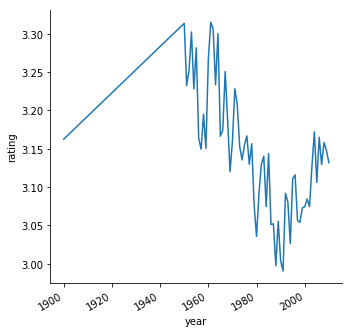

In [11]:
# визуализируем

import seaborn as sns

g = sns.relplot(x="year", y="rating", kind="line", data=ratings_films_grouped_by_year)
g.fig.autofmt_xdate()